<a href="https://colab.research.google.com/github/W-Srikongpan/Multivariate_Analysis/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction  

##Install packages  

In [1]:
install.packages("DataExplorer")
install.packages("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##Import libary

In [2]:
library(DataExplorer)
library(tidyr)
library(googledrive)

##Import file


In [4]:
data = read.csv('/content/sample_data/CreditApproval.csv')

##Descriptive

In [6]:
introduce(data) #check about data

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
690,16,10,6,0,67,653,11040,86304


In [7]:
head(data) #View data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
2,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
3,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
4,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
5,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
6,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,+


##Missing data

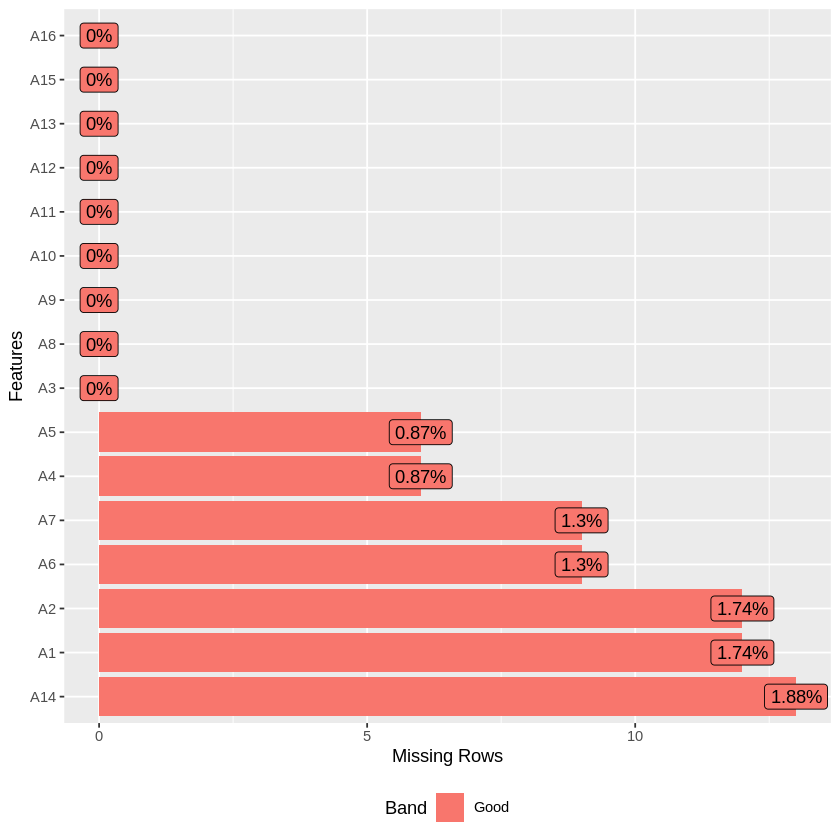

In [8]:
plot_missing(data) #plot missing data

In [9]:
datac = apply(is.na(data),2,which)
datac = drop_na(data)
head(datac)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
2,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
3,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
4,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
5,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
6,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,+


##Plot data

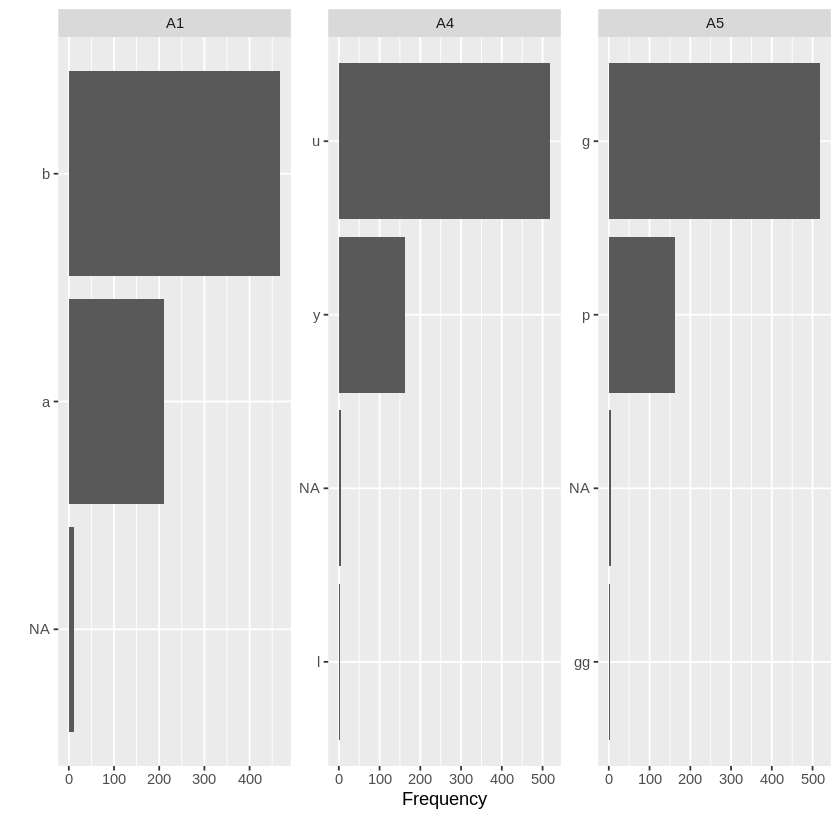

In [10]:
plot_bar(data[,c('A1','A4','A5')]) #plot bar data A1 A4 A5

Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


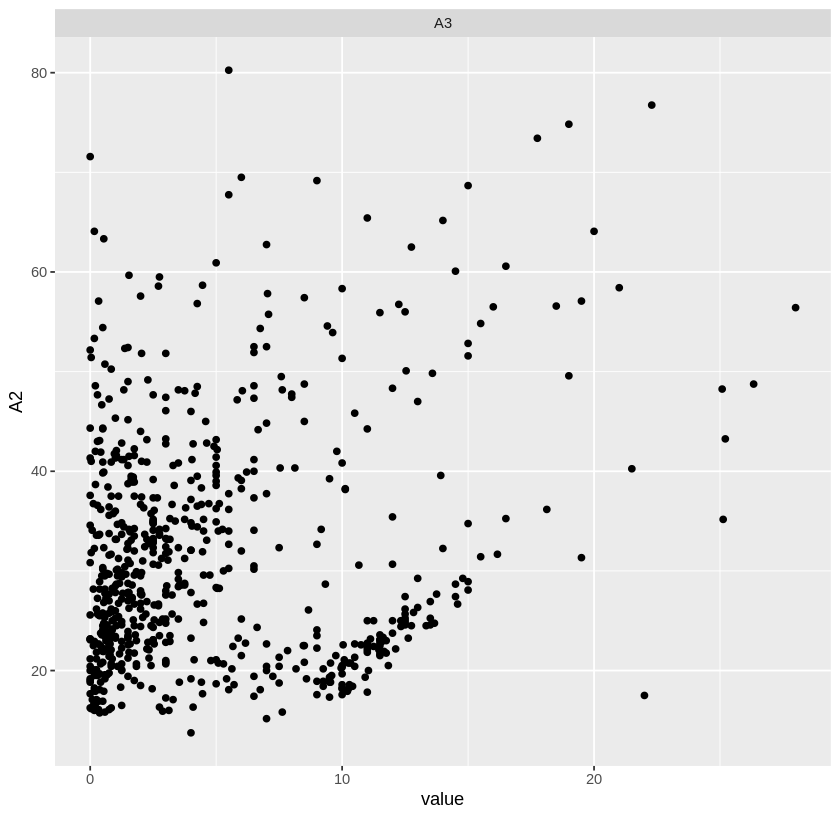

In [11]:
plot_scatterplot(data[,c('A2','A3')],by = 'A2') #plot scatterplot data A2 A3

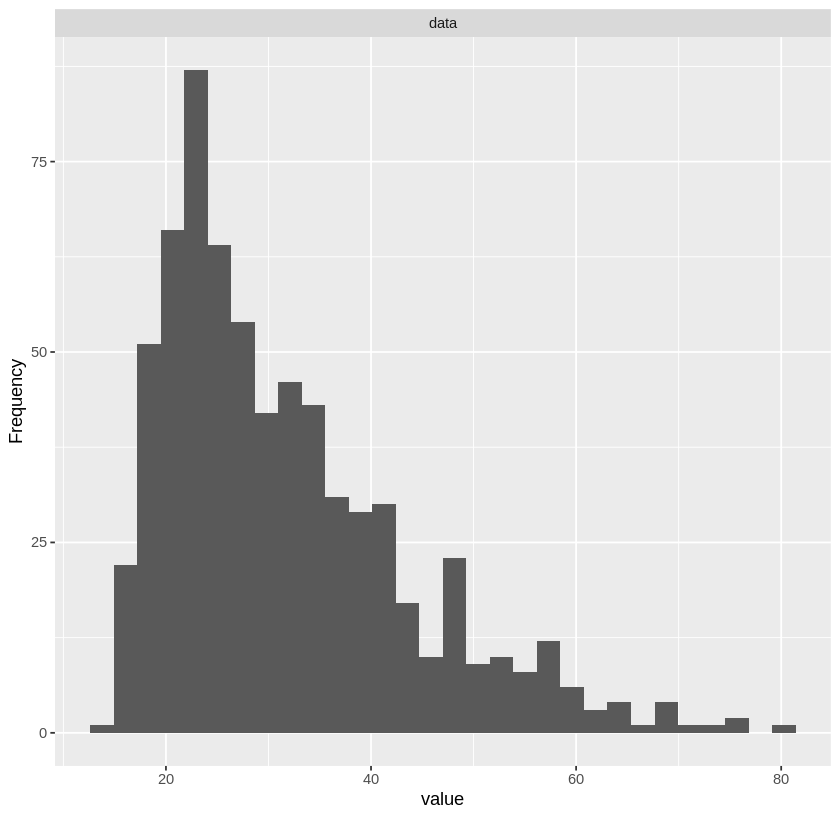

In [12]:
plot_histogram(data[,c('A2')]) #plot histogram data A2

##Summary data

In [13]:
summary(data) #check about data

      A1                  A2              A3              A4           
 Length:690         Min.   :13.75   Min.   : 0.000   Length:690        
 Class :character   1st Qu.:22.60   1st Qu.: 1.000   Class :character  
 Mode  :character   Median :28.46   Median : 2.750   Mode  :character  
                    Mean   :31.57   Mean   : 4.759                     
                    3rd Qu.:38.23   3rd Qu.: 7.207                     
                    Max.   :80.25   Max.   :28.000                     
                    NA's   :12                                         
      A5                 A6                 A7                  A8        
 Length:690         Length:690         Length:690         Min.   : 0.000  
 Class :character   Class :character   Class :character   1st Qu.: 0.165  
 Mode  :character   Mode  :character   Mode  :character   Median : 1.000  
                                                          Mean   : 2.223  
                                                 

#Simulation multivariate normal distribution

##Install packages

In [20]:
install.packages("MASS")
install.packages("MVN")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



    MVN dont support in Google Colab

##Import libary

In [24]:
library(MASS)
library(MVN)
library(ggplot2)

##Create Data

In [25]:
n = 100
mu = c(0,0)
sigma = matrix(c(10,3,3,2),2,2)
set.seed(1)
data2 = mvrnorm(n,mu,sigma)

##Normality test

    H0 : data2 is multivariate is normal distribution
    H1 : data2 is multivariate is not normal distribution

For conclustion, we will reject H0 iff p-value < 0.05

In [ ]:
result = mvn(data2,mvnTest = 'energy')

    $multivariateNormality
             Test Statistic p value MVN
    1 E-statistic  0.776035   0.211 YES

    $univariateNormality
              Test  Variable Statistic   p value Normality
    1 Anderson-Darling  Column1     0.1606    0.9465    YES   
    2 Anderson-Darling  Column2     0.3037    0.5658    YES   

    $Descriptives
        n        Mean  Std.Dev     Median       Min      Max
    1 100 -0.35456207 2.842604 -0.3066670 -7.422085 6.762622
    2 100 -0.07833414 1.308249 -0.1648912 -2.922124 2.989886
            25th      75th        Skew   Kurtosis
    1 -2.0355036 1.4850820 0.008489521 -0.0994797
    2 -0.9718803 0.8509195 0.094735194 -0.5930245

p-value = 0.22

Accept H0, So data2 is multivariate is normal distribution

In [ ]:
result = mvn(data2,mvnTest = 'energy', univariatePlot = 'qqplot', multivariatePlot = 'qq')

    $multivariateNormality
             Test Statistic p value MVN
    1 E-statistic  0.776035   0.216 YES

    $univariateNormality
                  Test  Variable Statistic   p value Normality
    1 Anderson-Darling  Column1     0.1606    0.9465    YES   
    2 Anderson-Darling  Column2     0.3037    0.5658    YES   

    $Descriptives
        n        Mean  Std.Dev     Median       Min      Max
    1 100 -0.35456207 2.842604 -0.3066670 -7.422085 6.762622
    2 100 -0.07833414 1.308249 -0.1648912 -2.922124 2.989886
            25th      75th        Skew   Kurtosis
    1 -2.0355036 1.4850820 0.008489521 -0.0994797
    2 -0.9718803 0.8509195 0.094735194 -0.5930245

In [ ]:
result = mvn(data2,mvnTest = 'energy', multivariatePlot = 'qq')

    $multivariateNormality
             Test Statistic p value MVN
    1 E-statistic  0.776035   0.208 YES

    $univariateNormality
                  Test  Variable Statistic   p value Normality
    1 Anderson-Darling  Column1     0.1606    0.9465    YES   
    2 Anderson-Darling  Column2     0.3037    0.5658    YES   

    $Descriptives
        n        Mean  Std.Dev     Median       Min      Max
    1 100 -0.35456207 2.842604 -0.3066670 -7.422085 6.762622
    2 100 -0.07833414 1.308249 -0.1648912 -2.922124 2.989886
            25th      75th        Skew   Kurtosis
    1 -2.0355036 1.4850820 0.008489521 -0.0994797
    2 -0.9718803 0.8509195 0.094735194 -0.5930245

#Iris data

##Import libary

In [40]:
library(readxl)

##Create Data

In [43]:
iris = read_excel("/content/sample_data/iris_xcel.xlsx")
data_iris = iris[c('Sepal.Length','Sepal.Width','Petal.Length','Petal.Width')]
head(data_iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


##Normality test

In [ ]:
result_data_iris = mvn(data_iris,mvnTest = 'energy')
result_data_iris = mvn(data_iris,mvnTest = 'energy',univariatePlot = 'qqplot')
result_data_iris = mvn(data_iris,mvnTest = 'energy',multivariatePlot = 'qq')

    $multivariateNormality
             Test Statistic p value MVN
    1 E-statistic  2.439962       0  NO

    $univariateNormality
                  Test     Variable Statistic   p value Normality
    1 Anderson-Darling Sepal.Length    0.8892  0.0225      NO    
    2 Anderson-Darling Sepal.Width     0.9657  0.0146      NO    
    3 Anderson-Darling Petal.Length    7.6729  <0.001      NO    
    4 Anderson-Darling Petal.Width     5.0628  <0.001      NO    

    $Descriptives
                   n     Mean   Std.Dev Median Min Max 25th 75th
    Sepal.Length 150 5.843333 0.8280661   5.80 4.3 7.9  5.1  6.4
    Sepal.Width  150 3.054000 0.4335943   3.00 2.0 4.4  2.8  3.3
    Petal.Length 150 3.758667 1.7644204   4.35 1.0 6.9  1.6  5.1
    Petal.Width  150 1.198667 0.7631607   1.30 0.1 2.5  0.3  1.8
                       Skew   Kurtosis
    Sepal.Length  0.3086407 -0.6058125
    Sepal.Width   0.3274013  0.1983681
    Petal.Length -0.2689994 -1.4166832
    Petal.Width  -0.1029060 -1.3573684